In [39]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import KFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
 
warnings.filterwarnings('ignore')

In [40]:
path = 'C:/Users/koo/Desktop/titanic/titanic/'

In [41]:
df_train, df_test= pd.read_csv(path+'train.csv'), pd.read_csv(path+'test.csv')

In [42]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [44]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [45]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [46]:
df_train[['Name','Sex','Ticket','Cabin','Embarked']].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [47]:
Pclass_Survived_0 = df_train.Pclass[df_train['Survived'] == 0].value_counts()
Pclass_Survived_1 = df_train.Pclass[df_train['Survived'] == 1].value_counts()
Pclass_Survived = pd.DataFrame({ 0: Pclass_Survived_0, 1: Pclass_Survived_1})
Pclass_Survived_0

3    372
2     97
1     80
Name: Pclass, dtype: int64

In [48]:
df_train['Appellation'] = df_train.Name.apply(lambda x: re.search('\w+\.', x).group()).str.replace('.', '')
df_train['Appellation_'] = df_train['Appellation']
df_train.Appellation.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [49]:
Appellation_Sex = pd.crosstab(df_train.Appellation, df_train.Sex)
Appellation_Sex.T

Appellation,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [50]:
df_train['Appellation'] = df_train['Appellation'].replace(['Capt','Col','Countess','Dr','Jonkheer','Major','Rev'], 'Rare')
df_train['Appellation'] = df_train['Appellation'].replace(['Mlle','Ms'], 'Miss')
df_train['Appellation'] = df_train['Appellation'].replace('Mme', 'Mrs')
df_train['Appellation'] = df_train['Appellation'].replace(['Don','Lady','Sir'], 'Master')
df_train.Appellation.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [51]:
Sex_Survived = pd.crosstab(df_train['Sex'], df_train['Survived'])
Sex_Survived

Survived,0,1
Sex,,
female,81,233
male,468,109


In [52]:
SibSp_Survived = pd.crosstab(df_train['SibSp'], df_train['Survived'])
SibSp_Survived

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


In [53]:
Ticket_Count = df_train.groupby('Ticket', as_index = False)['PassengerId'].count()
Ticket_Count_0 = Ticket_Count[Ticket_Count.PassengerId == 1]['Ticket']
df_train['GroupTicket'] = np.where(df_train.Ticket.isin(Ticket_Count_0), 0, 1)
df_train['GroupTicket'] 

0      0
1      0
2      0
3      1
4      0
      ..
886    0
887    0
888    1
889    0
890    0
Name: GroupTicket, Length: 891, dtype: int32

In [54]:
bins = [0, 60, 120, 180, 240, 300, 360, 420, 480, 540, 600]
df_train['GroupFare'] = pd.cut(df_train.Fare, bins, right = False)
GroupFare_Survived = pd.crosstab(df_train['GroupFare'], df_train['Survived'])
GroupFare_Survived

Survived,0,1
GroupFare,,
"[0, 60)",509,260
"[60, 120)",30,50
"[120, 180)",4,18
"[180, 240)",3,6
"[240, 300)",3,5
"[480, 540)",0,3


In [55]:
train = df_train.copy()

In [56]:
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

In [57]:
train['Cabin'] = train['Cabin'].fillna('NO')

In [58]:
Age_Appellation_median = train.groupby('Appellation_')['Age'].median()
train.set_index('Appellation', inplace = True)
train.Age.fillna(Age_Appellation_median, inplace = True)
train.reset_index(inplace = True)
train.Age.describe()

count    890.000000
mean      29.370978
std       13.260356
min        0.420000
25%       21.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [59]:
Embarked_Survived = pd.crosstab(train['Embarked'], train['Survived'])
Embarked_Survived

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,219


In [60]:
train['GroupCabin'] = np.where(train.Cabin == 'NO', 0, 1)
GroupCabin_Survived = pd.crosstab(train['GroupCabin'], train['Survived'])
GroupCabin_Survived

Survived,0,1
GroupCabin,,
0,481,206
1,68,136


In [61]:
bins = [0, 9, 18, 27, 36, 45, 54, 63, 72, 81, 90]
train['GroupAge'] = pd.cut(train.Age, bins)
GroupAge_Survived = pd.crosstab(train['GroupAge'], train['Survived'])
GroupAge_Survived

Survived,0,1
GroupAge,,
"(0, 9]",26,40
"(9, 18]",45,32
"(18, 27]",141,93
"(27, 36]",213,105
"(36, 45]",58,34
"(45, 54]",36,25
"(54, 63]",17,12
"(63, 72]",11,0
"(72, 81]",1,1


In [62]:
train['Appellation'] = train.Appellation.map({'Mr': 0, 'Mrs': 1, 'Miss': 2, 'Master': 3, 'Rare': 4})
train['Sex'] = train['Sex'].map({'female': 0, 'male': 1})
train.loc[train['Age'] < 9, 'Age'] = 0
train.loc[(train['Age'] >= 9) & (train['Age'] < 18), 'Age'] = 1
train.loc[(train['Age'] >= 18) & (train['Age'] < 27), 'Age'] = 2
train.loc[(train['Age'] >= 27) & (train['Age'] < 36), 'Age'] = 3
train.loc[(train['Age'] >= 36) & (train['Age'] < 45), 'Age'] = 4
train.loc[(train['Age'] >= 45) & (train['Age'] < 54), 'Age'] = 5
train.loc[(train['Age'] >= 54) & (train['Age'] < 63), 'Age'] = 6
train.loc[(train['Age'] >= 63) & (train['Age'] < 72), 'Age'] = 7
train.loc[(train['Age'] >= 72) & (train['Age'] < 81), 'Age'] = 8
train.loc[(train['Age'] >= 81) & (train['Age'] < 90), 'Age'] = 9
train['FamilySize'] = train.loc[:,['SibSp','Parch']].max(axis=1)
train['FamilySize'].unique()

array([1, 0, 3, 2, 5, 4, 8, 6], dtype=int64)

In [63]:
train['Name'][766]

'Brewe, Dr. Arthur Jackson'

In [64]:
train.loc[train['Fare'] < 60, 'Fare'] = 0
train.loc[(train['Fare'] >= 60) & (train['Fare'] < 120), 'Fare'] = 1
train.loc[(train['Fare'] >= 120) & (train['Fare'] < 180), 'Fare'] = 2
train.loc[(train['Fare'] >= 180) & (train['Fare'] < 240), 'Fare'] = 3
train.loc[(train['Fare'] >= 240) & (train['Fare'] < 300), 'Fare'] = 4
train.loc[(train['Fare'] >= 300) & (train['Fare'] < 360), 'Fare'] = 5
train.loc[(train['Fare'] >= 360) & (train['Fare'] < 420), 'Fare'] = 6
train.loc[(train['Fare'] >= 420) & (train['Fare'] < 480), 'Fare'] = 7
train.loc[(train['Fare'] >= 480) & (train['Fare'] < 540), 'Fare'] = 8
train.loc[(train['Fare'] >= 540) & (train['Fare'] < 600), 'Fare'] = 9
train['Embarked'] = train.Embarked.map({'S': 0, 'C': 1, 'Q': 2})
train.drop(['PassengerId', 'Name', 'GroupAge', 'SibSp', 'Parch', 'Ticket', 'GroupFare', 'Cabin', 'Appellation_'], axis = 1, inplace =True)

In [65]:
train['Age'][766]

nan

In [66]:
test = df_test.copy()
test['Appellation'] = test.Name.apply(lambda x: re.search('\w+\.', x).group()).str.replace('.', '')
test['Appellation_'] = test['Appellation']
test.Appellation.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [67]:
test['Appellation'] = test['Appellation'].replace(['Col','Dr','Rev'], 'Rare')
test['Appellation'] = test['Appellation'].replace('Ms', 'Miss')
test['Appellation'] = test['Appellation'].replace('Dona', 'Master')
test.Appellation.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [68]:
Ticket_Count = test.groupby('Ticket', as_index = False)['PassengerId'].count()
Ticket_Count_0 = Ticket_Count[Ticket_Count.PassengerId == 1]['Ticket']
test['GroupTicket'] = np.where(test.Ticket.isin(Ticket_Count_0), 0, 1)

In [69]:
bins = [0, 60, 120, 180, 240, 300, 360, 420, 480, 540, 600]
test['GroupFare'] = pd.cut(test.Fare, bins, right = False)

In [70]:
test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode()[0])
test['Cabin'] = test['Cabin'].fillna('NO')
Age_Appellation_median = test.groupby('Appellation_')['Age'].median()
test.set_index('Appellation', inplace = True)
test.Age.fillna(Age_Appellation_median, inplace = True)
test.reset_index(inplace = True)
test['GroupCabin'] = np.where(test.Cabin == 'NO', 0, 1)
bins = [0, 9, 18, 27, 36, 45, 54, 63, 72, 81, 90]
test['GroupAge'] = pd.cut(test.Age, bins)
test['Appellation'] = test.Appellation.map({'Mr': 0, 'Mrs': 1, 'Miss': 2, 'Master': 3, 'Rare': 4})
test['Sex'] = test['Sex'].map({'female': 0, 'male': 1})

test.loc[test['Age'] < 9, 'Age'] = 0
test.loc[(test['Age'] >= 9) & (test['Age'] < 18), 'Age'] = 1
test.loc[(test['Age'] >= 18) & (test['Age'] < 27), 'Age'] = 2
test.loc[(test['Age'] >= 27) & (test['Age'] < 36), 'Age'] = 3
test.loc[(test['Age'] >= 36) & (test['Age'] < 45), 'Age'] = 4
test.loc[(test['Age'] >= 45) & (test['Age'] < 54), 'Age'] = 5
test.loc[(test['Age'] >= 54) & (test['Age'] < 63), 'Age'] = 6
test.loc[(test['Age'] >= 63) & (test['Age'] < 72), 'Age'] = 7
test.loc[(test['Age'] >= 72) & (test['Age'] < 81), 'Age'] = 8
test.loc[(test['Age'] >= 81) & (test['Age'] < 90), 'Age'] = 9
test['FamilySize'] = test.loc[:,['SibSp','Parch']].max(axis=1)

test.loc[test['Fare'] < 60, 'Fare'] = 0
test.loc[(test['Fare'] >= 60) & (test['Fare'] < 120), 'Fare'] = 1
test.loc[(test['Fare'] >= 120) & (test['Fare'] < 180), 'Fare'] = 2
test.loc[(test['Fare'] >= 180) & (test['Fare'] < 240), 'Fare'] = 3
test.loc[(test['Fare'] >= 240) & (test['Fare'] < 300), 'Fare'] = 4
test.loc[(test['Fare'] >= 300) & (test['Fare'] < 360), 'Fare'] = 5
test.loc[(test['Fare'] >= 360) & (test['Fare'] < 420), 'Fare'] = 6
test.loc[(test['Fare'] >= 420) & (test['Fare'] < 480), 'Fare'] = 7
test.loc[(test['Fare'] >= 480) & (test['Fare'] < 540), 'Fare'] = 8
test.loc[(test['Fare'] >= 540) & (test['Fare'] < 600), 'Fare'] = 9
test['Embarked'] = test.Embarked.map({'S': 0, 'C': 1, 'Q': 2})
test.drop(['PassengerId', 'Name', 'GroupAge', 'SibSp', 'Parch', 'Ticket', 'GroupFare', 'Cabin', 'Appellation_'], axis = 1, inplace =True)

In [71]:
train.shape

(891, 10)

In [72]:
test.shape

(418, 9)

In [73]:
trainlabel = train['Survived'] 
train = train.drop('Survived', axis=1)

In [74]:
train['Age'][766] = 35
test['Fare'][152] = 13.8

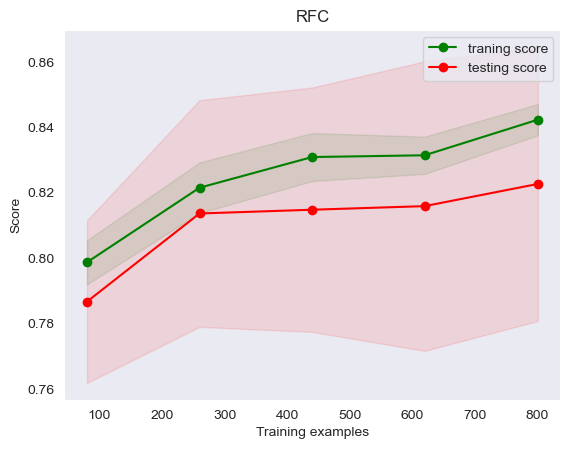

In [75]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV

def plot_learning_curve(estimator, title, X, y, cv=10,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title) # 设置图的 title
    plt.xlabel('Training examples') # 横坐标
    plt.ylabel('Score') # 纵坐标
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv,
                                                            train_sizes=train_sizes) 
    train_scores_mean = np.mean(train_scores, axis=1) # 计算平均值
    train_scores_std = np.std(train_scores, axis=1) # 计算标准差
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid() # 设置背景的网格

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,
                     alpha=0.1, color='g') # 设置颜色
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,
                     alpha=0.1, color='r')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='g',
             label='traning score') # 绘制训练精度曲线
    plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
             label='testing score') # 绘制测试精度曲线
    plt.legend(loc='best')
    return plt

X = train
y = trainlabel
clf = RandomForestClassifier()
para_grid = {'max_depth': [10], 'n_estimators': [80], 'max_features': [1, 5, 10], 'criterion': ['gini', 'entropy'],
             'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 5, 10]}
gs = GridSearchCV(clf, param_grid=para_grid, cv=3, scoring='accuracy')
gs.fit(X, y)
gs_best = gs.best_estimator_ 
gs.best_score_ 

g = plot_learning_curve(gs_best, 'RFC', X, y)


In [77]:
gs.best_score_

0.8294051627384961

In [78]:
servived = gs_best.predict(test)
servived

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [79]:
df = pd.DataFrame(servived)
writer = pd.ExcelWriter('hhh.xlsx')  #关键2，创建名称为hhh的excel表格
df.to_excel(writer)  #关键3，float_format 控制精度，将data_df写到hhh表格的第一页中。若多个文件，可以在page_2中写入
writer.save() 